In [43]:
def drawHorizon(img):
    #cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    return img
def estimateHorizon(img):
    return np.array([[418.2195998, 880.253216], [400, 820.94125636]])
with open("test.txt", "rb") as fp:   # Unpickling
   b = pickle.load(fp)

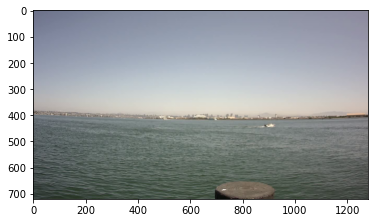

In [47]:
import cv2
import cameratransform as ct
import numpy as np

from  matplotlib import pyplot as plt # For Visualizing 
%matplotlib inline

boat_gps_file = "AI Tracks at Sea High Frequency GPS_train.txt"
# To make determining the appropriate GPS reading easier the first eight videos will be used for training 
# and the final 9 will be used for testing in early stages
train_video_files = [f"data/video/{i}.mp4" for i in range(6,14)]# Each video is 3 minutes long 
test_video_files = [f"data/video/{i}.mp4" for i in range(14,23)]# Each video is 3 minutes long 

start_time = "2020-09-30T18:48:18Z"
cam_lat, cam_long = 32.70297, -117.23463100000001

# intrinsic camera parameters
f = 6.2    # in mm
sensor_size = (6.17, 4.55)    # in mm
image_size = (720, 1280)    # in px
# initialize the camera
cam = ct.Camera(ct.RectilinearProjection(focallength_mm=f,
                                         sensor=sensor_size,
                                         image=image_size))#,lens = cameratransform.BrownLensDistortion())
cam.setGPSpos(cam_lat, cam_long)
sample = cv2.VideoCapture(train_video_files[0]).read()[1]
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)

horizon = estimateHorizon(sample)
#cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
# Horizon Information is added only once since the camera is stationary
cam.addHorizonInformation(horizon, uncertainty=10)

view = plt.imshow(drawHorizon(sample))

In [49]:
# Collect Pixel Values to Fit Camera Parameters 
for video_file in train_video_files:
    read = True
    video = cv2.VideoCapture(video_file)
    lm_points_px = np.array([[2091.300935, 892.072126], [2935.904577, 824.364956]])
    while read:
        read, frame = video.read() 
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
    # Collect GPS from logs 
    lm_points_gps = ct.gpsFromString([("66°39'56.12862''S  140°01'20.39562''", 13.769),
                                      ("66°39'58.73922''S  140°01'09.55709''", 21.143)])
    lm_points_space = cam.spaceFromGPS(lm_points_gps)
    cam.addLandmarkInformation(lm_points_px, lm_points_space, [3, 3, 5])
# Fit Camera Parameters 
trace = cam.metropolis([
        ct.FitParameter("elevation_m", lower=0, upper=100, value=20),
        ct.FitParameter("tilt_deg", lower=0, upper=180, value=80),
        ct.FitParameter("heading_deg", lower=-180, upper=180, value=-77),
        ct.FitParameter("roll_deg", lower=-180, upper=180, value=0)
        ], iterations=1e4)
cam.plotTrace()
plt.tight_layout()

error: OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


100%|██████████| 10000/10000 [00:11<00:00, 894.44it/s, acc_rate=0.268, factor=0.729]

      elevation_m    tilt_deg  heading_deg  roll_deg  probability
0       18.245658  108.297076   -86.503320 -1.371311    -6.494155
1       18.245658  108.297076   -86.503320 -1.371311    -6.494155
2       18.245658  108.297076   -86.503320 -1.371311    -6.494155
3       18.245658  108.297076   -86.503320 -1.371311    -6.494155
4       18.245658  108.297076   -86.503320 -1.371311    -6.494155
...           ...         ...          ...       ...          ...
8994    22.625991  108.187371  -186.467355 -1.550764    -7.208932
8995    23.674957  107.806243  -187.597903 -0.901197    -7.558747
8996    23.674957  107.806243  -187.597903 -0.901197    -7.558747
8997    23.674957  107.806243  -187.597903 -0.901197    -7.558747
8998    23.879288  108.435264  -188.191149 -0.932585    -8.457602

[8999 rows x 5 columns]


In [48]:

#im2 = video.read()[1][:,:,::-1] 
from IPython.display import Video

Video(train_video_files[0])

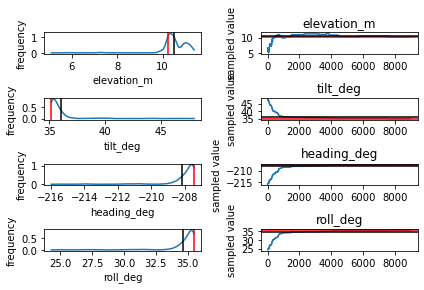